# Bank Modelling

The .csv files creditdefault_train & creditdefault_test contain information on different bank accounts with many different variables ('X1 - X23' columns) and whether these people are eligible for a mortgage ('Y' column). Using several different types of implementations, I aim to see which ones produce the best models at predicting whether an account will be accepted for a mortgage.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree, metrics
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
#imports relevant libraries

In [2]:
train_data = pd.read_csv('creditdefault_train.csv', header = 'infer')

test_data = pd.read_csv('creditdefault_test.csv', header = 'infer')
#reads in training & test data

## kNN Implementation

In [60]:
knn_train = train_data.copy()

knn_x = knn_train.drop(['Y'], axis=1)

knn_y = knn_train['Y']
#Creates a copy of the training set and splits it into X & Y values

In [61]:
knn_XTrain, knn_XTest, knn_YTrain, knn_YTest = train_test_split(knn_x, knn_y, test_size=0.25, random_state=1)
#splits the training set into 75% training set & 25% testing

In [240]:
Accuracyknn = []
paramknn = []
distFunction = ["euclidean", "manhattan"]
#Lists to hold accuracy, parameters, and metric

for func in distFunction:
    for k in range(1, 21):
        clfknn = KNeighborsClassifier(n_neighbors=k, metric=func)
        ScoresOfknn = cross_val_score(clfknn, knn_XTrain, knn_YTrain, cv=5)
        Accuracyknn.append(ScoresOfknn.mean())
        paramknn.append((k, func))

#Builds kNN models on the training data. Performs cross-validation
#Number of neighbours varies between 1 to 20. Metrics change between Euclidean and Manhattan

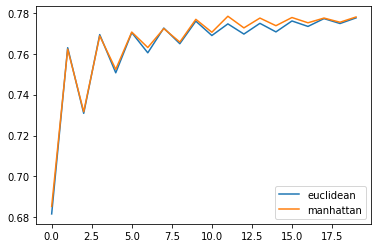

In [245]:
NeighborsList = []
for i in range(0, 20):
    NeighborsList.append(i)
#adds index of 20, used to separate metric

for i in range(2):
    knnAccuraciesList = []
    for j in range(0, 20):
        knnAccuraciesList.append(Accuracyknn[(i*20)+j])
    plt.plot(NeighborsList, knnAccuraciesList, label=distFunction[i])
#separates the metrics and plots a graph

plt.legend()
plt.show()

In [251]:
BestAccknn = max(Accuracyknn)
BestParamsknn = paramknn[Accuracyknn.index(BestAccknn)]
BestNeighbors = BestParamsknn[0]
BestMetric = BestParamsknn[1]
#Finds highest accuracy attained, and finds the parameters which achieved that accuracy
print("Highest accuracy attained was :", BestAccknn, ", which had neighbors: ", BestNeighbors, " and used metric: ", BestMetric)
#Prints accuracy

Highest accuracy attained was : 0.7783111111111112 , which had neighbors:  12  and used metric:  manhattan


In [62]:
Optimumknn = KNeighborsClassifier(n_neighbors = 12, metric="manhattan")
Optimumknn.fit(knn_XTrain, knn_YTrain)
#Builds a kNN model using optimum parameters
OptimumknnPred = Optimumknn.predict((knn_XTest))
finalAccknn = metrics.accuracy_score(OptimumknnPred, knn_YTest)
#Evaluates predicted Y values with actual Y values of the testing data
print("Accuracy of Optimum knn on testing data = " ,finalAccknn)
#Prints accuracy

Accuracy of Optimum knn on testing data =  0.7728


Optimum kNN Model returns an accuracy of 77.28%

## Decision Tree Implementation

In [51]:
DT_train = train_data.copy()

DT_x = DT_train.drop(['Y'], axis = 1)

DT_y = DT_train['Y']
#creates a copy of the training dataset, splitting the data into X & Y

In [58]:
DT_XTrain, DT_XTest, DT_YTrain, DT_YTest = train_test_split(DT_x, DT_y, test_size = 0.25, random_state = 1)
#splits dataset into 75% for training and 25% for testing

In [49]:
GiniDepthAccuracy = []
GiniDepth = []
#lists to hold accuracy of each depth

for currentDepth in range(3, 20):
    clfGiniDT = tree.DecisionTreeClassifier(random_state=1, criterion= 'gini', max_depth= currentDepth)
    ScoreOfDepthGini = cross_val_score(clfGiniDT, DT_XTrain, DT_YTrain, cv = 5)
    GiniDepthAccuracy.append(ScoreOfDepthGini.mean())
    GiniDepth.append(currentDepth)
#Creates multiple decision trees using gini impurity on the training data
#Performs cross-validation to evaluate the score, with 5 folds
#Loops between trees of max depth 3 to max depth 20

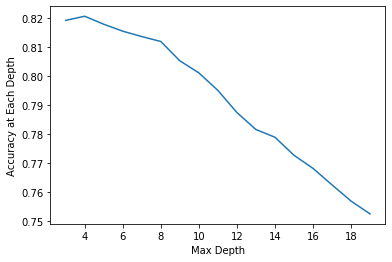

In [50]:
plt.plot(GiniDepth, GiniDepthAccuracy)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy at Each Depth')
plt.show()
#Plots the accuracy of each depth

In [51]:
bestAccGini = max(GiniDepthAccuracy)
bestDepthGini = GiniDepth[GiniDepthAccuracy.index(bestAccGini)]
print("Highest Accuracy was :", bestAccGini, ", which was a tree of depth: ", bestDepth)
#Finds the highest accuracy, and what depth the tree was

Highest Accuracy was : 0.8206222222222224 , which was a tree of depth:  3


In [52]:
EntropyDepthAccuracy = []
EntropyDepth = []
#List to hold accuracy at each depth

for currentDepth in range(3, 20):
    clfEntropyDT = tree.DecisionTreeClassifier(random_state= 1, criterion = 'entropy', max_depth = currentDepth)
    ScoreOfDepthEntropy = cross_val_score(clfEntropyDT, DT_XTrain, DT_YTrain, cv= 5)
    EntropyDepthAccuracy.append(ScoreOfDepthEntropy.mean())
    EntropyDepth.append(currentDepth)
#Creates multiple decision trees using entropy information on the training data
#Performs cross-validation to evaluate the score, with 5 folds
#Loops between trees of max depth 3 to max depth 20

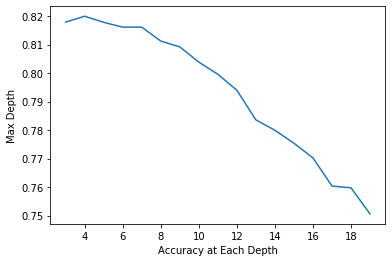

In [53]:
plt.plot(EntropyDepth, EntropyDepthAccuracy)
plt.xlabel("Accuracy at Each Depth")
plt.ylabel("Max Depth")
plt.show()
#plots data

In [54]:
bestAccEntropy = max(EntropyDepthAccuracy)
bestDepthEntropy = EntropyDepth[EntropyDepthAccuracy.index(bestAccEntropy)]
print("Highest Accuracy was :", bestAccEntropy, ", which was a tree of depth: ", bestDepthEntropy)
#Finds the highest accuracy, and what depth the tree was

Highest Accuracy was : 0.8199111111111111 , which was a tree of depth:  4


Optimum Parameters is therefore criterion 'Gini' and depth '3'

In [59]:
OptimumDT = tree.DecisionTreeClassifier(random_state=1, criterion='gini', max_depth= 3)
OptimumDT.fit(DT_XTrain, DT_YTrain)
#Build a decision tree using the optimum parameters
OptimumDTPredict = OptimumDT.predict(DT_XTest)
FinalAccDT = metrics.accuracy_score(DT_YTest, OptimumDTPredict)
#Evaluates predicted Y values with actual Y values of the testing data
print("Accuracy of optimum decision tree on testing data = ", FinalAccDT)
#Prints accuracy value

Accuracy of optimum decision tree on testing data =  0.8197333333333333


Optimum Decision Tree returns an accuracy of 81.973%

## Random Forest Implementation

In [44]:
RF_train = train_data.copy()

RF_X = RF_train.drop(['Y'], axis=1)
RF_Y = RF_train['Y']

#creates copy of training data, and splits it into X & Y

In [45]:
RF_XTrain, RF_XTest, RF_YTrain, RF_YTest = train_test_split(RF_X, RF_Y, test_size= 0.25, random_state= 1)
#splits training data into 75% training & 25% testing

In [46]:
NumberOfEstimators = []
AccuracyOfEstimators = []
#Lists to hold the number of estimators used, and the relevant accuracy

for numOfEstimator in range(10, 200, 10):
    clfRF = RandomForestClassifier(n_jobs = 2, n_estimators = numOfEstimator, random_state = 0)
    ScoreOfEstimators = cross_val_score(clfRF, RF_XTrain, RF_YTrain, cv = 5)
    AccuracyOfEstimators.append(ScoreOfEstimators.mean())
    NumberOfEstimators.append(numOfEstimator)
#Creates multiple random forest classifiers, and performs cross-validation
#Number of estimators range between 10 and 190, with the number of estimators increasing 
#by 10 each iteration

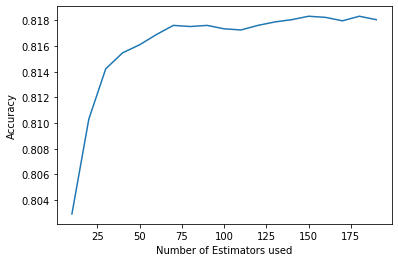

In [71]:
plt.plot(NumberOfEstimators, AccuracyOfEstimators)
plt.xlabel("Number of Estimators used")
plt.ylabel("Accuracy")
plt.show()
#plots data

In [47]:
bestAccRF = max(AccuracyOfEstimators)
bestNumOfEstimatorsRF = NumberOfEstimators[AccuracyOfEstimators.index(bestAccRF)]
print("Best Accuracy was: ", bestAccRF, ", which was number of estimators used: ", bestNumOfEstimatorsRF)
#returns optimum Random Forest classifier parameters

Best Accuracy was:  0.8183111111111112 , which was number of estimators used:  180


In [49]:
OptimumRF = RandomForestClassifier(n_jobs = 2, n_estimators=180, random_state = 0)
OptimumRF.fit(RF_XTrain, RF_YTrain)
#build Random Forest model using optimum parameters
OptimumRFPrediction = OptimumRF.predict(RF_XTest)
FinalAccRF = metrics.accuracy_score(RF_YTest, OptimumRFPrediction)
#Evaluates predicted Y values with actual Y values of the testing data
print("Accuracy of optimum Random Forest is: ", FinalAccRF)
#Prints accuracy

Accuracy of optimum Random Forest is:  0.8109333333333333


Optimum Random Forest returns an accuracy of 81.093%

## Bagging Implementation

In [63]:
Bagging_train = train_data.copy()
Bag_X = Bagging_train.drop(['Y'], axis=1)
Bag_Y = Bagging_train['Y']
#Makes a copy of the training data and splits it into X & Y

In [64]:
Bag_XTrain, Bag_XTest, Bag_YTrain, Bag_YTest = train_test_split(Bag_X, Bag_Y, test_size=0.25, random_state=1)
#Splits training data into 75% training and 25% testing

In [186]:
BaggingAccuracy = []
NumOfEstimatorsBaggingAndDepth = []

for currentDepth in range(3,11):
    for numOfEstimators in range(1, 51):
        clfBag = BaggingClassifier(tree.DecisionTreeClassifier(max_depth=currentDepth),n_estimators=numOfEstimators)
        ScoreOfCurrentBagging = cross_val_score(clfBag, Bag_XTrain, Bag_YTrain, cv = 5)
        BaggingAccuracy.append(ScoreOfCurrentBagging.mean())
        NumOfEstimatorsBaggingAndDepth.append((currentDepth, numOfEstimators))

#Builds multiple Bagging Models and performs cross-validation to assess accuracies
#Uses different depths and estimators to find optimum parameters
#Each depth uses 50 estimators, and depths range from 3 to 10

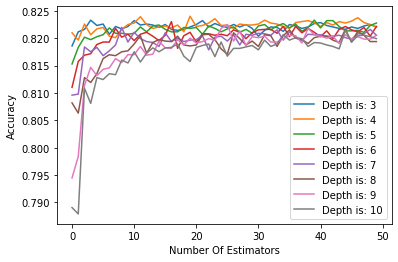

In [209]:
EstimatorsList = []
for i in range(50):
    EstimatorsList.append(i)
#adds index of 50, for use to separate estimators

for i in range(8):
    AccuraciesList = []    
    for j in range(0, 50):
        AccuraciesList.append(BaggingAccuracy[(i*50) + j])
    plt.plot(EstimatorsList, AccuraciesList, label="Depth is: "+str(i+3))
#separates the estimators for each depth and plots it as a graph   
plt.xlabel("Number Of Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
#plots data

In [208]:
BestAccBagging = max(BaggingAccuracy)
BestDepthAndEstimatorsBagging = NumOfEstimatorsBaggingAndDepth[BaggingAccuracy.index(BestAccBagging)]
BestDepthBagging = BestDepthAndEstimatorsBagging[0]
BestEstimatorsBagging = BestDepthAndEstimatorsBagging[1]
print("Best Accuracy was: ", BestAccBagging, " , which had a depth of :", BestDepthBagging, " and estimators :" ,BestEstimatorsBagging)
#Finds the highest accuracy, and finds the parameters for which the accuracy was found

Best Accuracy was:  0.8240000000000001  , which had a depth of : 4  and estimators : 20


In [65]:
OptimumBagging = BaggingClassifier(tree.DecisionTreeClassifier(max_depth=4),n_estimators=20, random_state = 1)
OptimumBagging.fit(Bag_XTrain, Bag_YTrain)
#Builds Bagging Model with optimum parameters
OptimumBaggingPredict = OptimumBagging.predict(Bag_XTest)
FinalAccBagging = metrics.accuracy_score(Bag_YTest, OptimumBaggingPredict)
#Evaluates predicted Y values with actual Y values of the testing data
print("Accuracy of Optimum Bagging Model is: ", FinalAccBagging)
#Prints accuracy

Accuracy of Optimum Bagging Model is:  0.8208


Optimum Bagging Model returns on acccuracy of 82.08%

## Boosting Implementation

In [19]:
Boost_train = train_data.copy()
Boost_X = Boost_train.drop(['Y'], axis=1)
Boost_Y = Boost_train['Y']
#Makes a copy of the training data and splits it into X & Y

In [20]:
Boost_XTrain, Boost_XTest, Boost_YTrain, Boost_YTest = train_test_split(Boost_X, Boost_Y, test_size=0.25, random_state=1)
#Splits training data into 75% training and 25% testing

In [25]:
BoostAcc = []
BoostDepthAndEstimators = []
#List to hold accuracy and parameters

for currentDepth in range(3,11):
    for numOfEstimators in range(1, 51):
        clfBoost = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=currentDepth), n_estimators=numOfEstimators)
        ScoreOfBoost = cross_val_score(clfBoost, Boost_XTrain, Boost_YTrain, cv= 5)
        BoostAcc.append(ScoreOfBoost.mean())
        BoostDepthAndEstimators.append((currentDepth, numOfEstimators))
        
#Builds multiple Boosting Models and performs cross-validation to assess accuracies
#Uses different depths and estimators to find optimum parameters
#Each depth uses 50 estimators, and depths range from 3 to 10

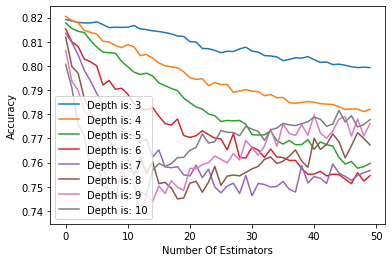

In [35]:
IndicesList = []
for i in range(50):
    IndicesList.append(i)
#adds index of 50, for use to separate estimators


for i in range(8):
    BoostAccuracies = []
    for j in range(0,50):
        BoostAccuracies.append(BoostAcc[(i*50) + j])
    plt.plot(IndicesList, BoostAccuracies, label="Depth is: " + str(i+3))
#separates the estimators for each depth and plots it as a graph
plt.xlabel("Number Of Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [40]:
BestBoostAcc = max(BoostAcc)
BestBoostDepthAndEstimator = BoostDepthAndEstimators[BoostAcc.index(BestBoostAcc)]
BestBoostDepth = BestBoostDepthAndEstimator[0]
BestBoostEstimator = BestBoostDepthAndEstimator[1]
#Finds highest accuracy, and then finds the depth and number of estimators that acquired that accuracy
print("Highest accuracy was: ", BestBoostAcc, ", which was attained with depth: ", BestBoostDepth, ", and estimator: ", BestBoostEstimator)
#Prints accuracy

Highest accuracy was:  0.8205333333333333 , which was attained with depth:  4 , and estimator:  1


In [66]:
OptimumBoost = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=4), n_estimators=1)
OptimumBoost.fit(Boost_XTrain, Boost_YTrain)
#Builds Boosting Model using best parameters
OptimumBoostPredict = OptimumBoost.predict(Boost_XTest)
finalAccBoost = metrics.accuracy_score(Boost_YTest, OptimumBoostPredict)
#Evaluates predicted Y values with actual Y values of the testing data
print("Accuracy of optimum Boosting Model: ", finalAccBoost)
#Prints accuracy

Accuracy of optimum Boosting Model:  0.8210666666666666


Optimum Boosting Model returns an accuracy of 82.107%

## SVM Implementation

In [67]:
SVM_train = train_data.copy()

SVM_x = SVM_train.drop(['Y'], axis=1)

SVM_y = SVM_train['Y']
#Creates a copy of the training set and splits it into X & Y

In [68]:
SVM_XTrain, SVM_XTest, SVM_YTrain, SVM_YTest = train_test_split(SVM_x, SVM_y, test_size=0.25, random_state=1)
#Splits the data into 75% training and 25% testing

In [6]:
SVMparam = [0.01, 0.05, 0.1, 1, 2, 5, 10]
SVMAcc = []
#List to hold accuracy of SVM model and the parameters

for param in SVMparam:
    clfSVM = SVC(C=param, kernel='sigmoid')
    ScoreSVMParam = cross_val_score(clfSVM, SVM_XTrain, SVM_YTrain, cv = 5)
    SVMAcc.append(ScoreSVMParam.mean())

#Builds SVM models with different parameters. Performs cross-validation on each parameter

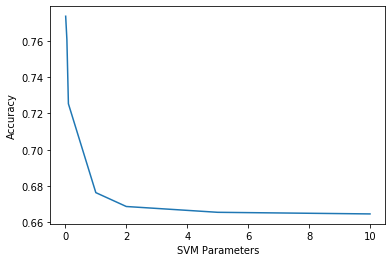

In [10]:
plt.plot(SVMparam, SVMAcc)
plt.xlabel('SVM Parameters')
plt.ylabel('Accuracy')
plt.show()
#Plots data found

In [16]:
BestSVMAcc = max(SVMAcc)
BestSVMparam = SVMparam[SVMAcc.index(BestSVMAcc)]
#Finds highest accuracy and finds the parameter that attained that accuracy
print("Highest accuracy attained was: ", BestSVMAcc, ", which had hyperparameter: ", BestSVMparam)

Highest accuracy attained was:  0.7736 , which had hyperparameter:  0.01


In [69]:
OptimumSVM = SVC(C=0.01, kernel='sigmoid')
OptimumSVM.fit(SVM_XTrain, SVM_YTrain)
#Build SVM model using best parameters
OptimumSVMPred = OptimumSVM.predict(SVM_XTest)
finalAccSVM = metrics.accuracy_score(OptimumSVMPred, SVM_YTest)
#Evaluates predicted Y values with actual Y values of the testing data
print("Accuracy of optimum SVM model is :", finalAccSVM)
#Prints accuracy

Accuracy of optimum SVM model is : 0.7725333333333333


Optimum SVM model returns an accuracy of 77.253%

## Using Best Accuracy Model

The Boosting Model returned an accuracy of 82.107%. So we will use it on the testing data

In [71]:
Boost_Test = test_data.copy()

Boost_Test_x = Boost_Test.drop(['Y'], axis=1)
Boost_Test_y = Boost_Test['Y']
#Creates a copy of the test dataset

In [73]:
FinalBoost = OptimumBoost
#Uses the optimum Boosting model found

FinalBoostPredict = FinalBoost.predict(Boost_Test_x)
AccuracyOnTest = metrics.accuracy_score(Boost_Test_y, FinalBoostPredict)
#Evaluates model's performance on test set
print("Accuracy attained on test dataset is: ", AccuracyOnTest)

Accuracy attained on test dataset is:  0.8164


The Boosting Model acquired an accuracy of 81.64% on the testing dataset